# **วิเคราะห์แนวโน้มการติด Covid - 19 จากอาการ**

### 📂เกี่ยวกับชุดข้อมูล
เป็นชุดข้อมูลที่เกี่ยวข้องกับการวิเคราะห์อาการ COVID-19

🧾 ข้อมูลประกอบไปด้วย :

• Fever : ไข้  
• Tiredness : เหน็ดเหนื่อยเมื่อยล้า  
• Dry-Cough : ไอแห้ง  
• Difficulty-in-Breathing : หายใจลำบาก  
• Sore-Throat : เจ็บคอ  
• None_Sympton : ไม่มีอาการ  
• Pains : ความเจ็บปวด  
• Nasal-Congestion : คัดจมูก  
• Runny-Nose : อาการน้ำมูกไหล  
• Diarrhea : ท้องเสีย  
• None_Experiencing : ไม่มีประสบการณ์  
• Age_0-9  : อายุ 0-9  
• Age_10-19 : อายุ 10-19  
• Age_20-24 : อายุ 20-24  
• Age_25-59 : อายุ 25-59  
• Age_60+ : อายุ 60+  
• Gender_Female : เพศหญิง  
• Gender_Male : เพศชาย  
• Gender_Transgender : เพศ ข้ามเพศ  
• Severity_Mild : รุนแรงเล็กน้อย  
• Severity_Moderate : ความรุนแรงปานกลาง  
• Severity_None : ความรุนแรงไม่มี  
• Severity_Severe : ความรุนแรงมากที่สุด  
• Contact_Dont-Know : ติดต่อไม่รู้    
• Contact_No : ไม่ติดต่อ  
• Contact_Yes : ติดต่อ













### 📚 Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 🌐 Loading Data

In [22]:
df = pd.read_csv("Cleaned-Data.csv")
pd.set_option('display.max_columns',None)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


Comprobamos todos los valores que toma la característica Country

In [23]:
print("Número de valores que toma la característica Country ->")
df['Country'].unique()

Número de valores que toma la característica Country ->


array(['China', 'Italy', 'Iran', 'Republic of Korean', 'France', 'Spain',
       'Germany', 'UAE', 'Other-EUR', 'Other'], dtype=object)

Podemos pensar que esta característica no va a ser la más importante de entre las que tenemos. Vamos a quitarla de nuestro conjunto de datos

In [24]:
df.drop("Country",axis=1,inplace=True)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


Peeking into Data

📏Size of data

In [25]:
display("Shape of dataset")
print("Rows:",df.shape[0],"\nColumns:",df.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 26


NULL Values

In [26]:
display("Description",df.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   None_Sympton             316800 non-null  int64
 6   Pains                    316800 non-null  int64
 7   Nasal-Congestion         316800 non-null  int64
 8   Runny-Nose               316800 non-null  int64
 9   Diarrhea                 316800 non-null  int64
 10  None_Experiencing        316800 non-null  int64
 11  Age_0-9                  316800 non-null  int64
 12  Age_10-19                316800 non-null  int64
 13  Age_20-24                316800 non-null  int64
 14  Age_25-59                316800 non-

Checking distribution of data

In [29]:
for i in df.columns:
    print("\nColumn Name:",i,"-->",df[i].unique(),"-->Unique Count",len(df[i].unique()))


Column Name: Fever --> [1 0] -->Unique Count 2

Column Name: Tiredness --> [1 0] -->Unique Count 2

Column Name: Dry-Cough --> [1 0] -->Unique Count 2

Column Name: Difficulty-in-Breathing --> [1 0] -->Unique Count 2

Column Name: Sore-Throat --> [1 0] -->Unique Count 2

Column Name: None_Sympton --> [0 1] -->Unique Count 2

Column Name: Pains --> [1 0] -->Unique Count 2

Column Name: Nasal-Congestion --> [1 0] -->Unique Count 2

Column Name: Runny-Nose --> [1 0] -->Unique Count 2

Column Name: Diarrhea --> [1 0] -->Unique Count 2

Column Name: None_Experiencing --> [0 1] -->Unique Count 2

Column Name: Age_0-9 --> [1 0] -->Unique Count 2

Column Name: Age_10-19 --> [0 1] -->Unique Count 2

Column Name: Age_20-24 --> [0 1] -->Unique Count 2

Column Name: Age_25-59 --> [0 1] -->Unique Count 2

Column Name: Age_60+ --> [0 1] -->Unique Count 2

Column Name: Gender_Female --> [0 1] -->Unique Count 2

Column Name: Gender_Male --> [1 0] -->Unique Count 2

Column Name: Gender_Transgender -->

Realizamos un histograma para cada característica. De esta manera podemos comprobar el número de pacientes que han tenido síntomas como fiebre, cansancio o dificultad para respirar.
También podemos mirar los rangos de edad de los pacientes o su género.

array([[<AxesSubplot: title={'center': 'Fever'}>,
        <AxesSubplot: title={'center': 'Tiredness'}>,
        <AxesSubplot: title={'center': 'Dry-Cough'}>,
        <AxesSubplot: title={'center': 'Difficulty-in-Breathing'}>,
        <AxesSubplot: title={'center': 'Sore-Throat'}>],
       [<AxesSubplot: title={'center': 'None_Sympton'}>,
        <AxesSubplot: title={'center': 'Pains'}>,
        <AxesSubplot: title={'center': 'Nasal-Congestion'}>,
        <AxesSubplot: title={'center': 'Runny-Nose'}>,
        <AxesSubplot: title={'center': 'Diarrhea'}>],
       [<AxesSubplot: title={'center': 'None_Experiencing'}>,
        <AxesSubplot: title={'center': 'Age_0-9'}>,
        <AxesSubplot: title={'center': 'Age_10-19'}>,
        <AxesSubplot: title={'center': 'Age_20-24'}>,
        <AxesSubplot: title={'center': 'Age_25-59'}>],
       [<AxesSubplot: title={'center': 'Age_60+'}>,
        <AxesSubplot: title={'center': 'Gender_Female'}>,
        <AxesSubplot: title={'center': 'Gender_Male'}

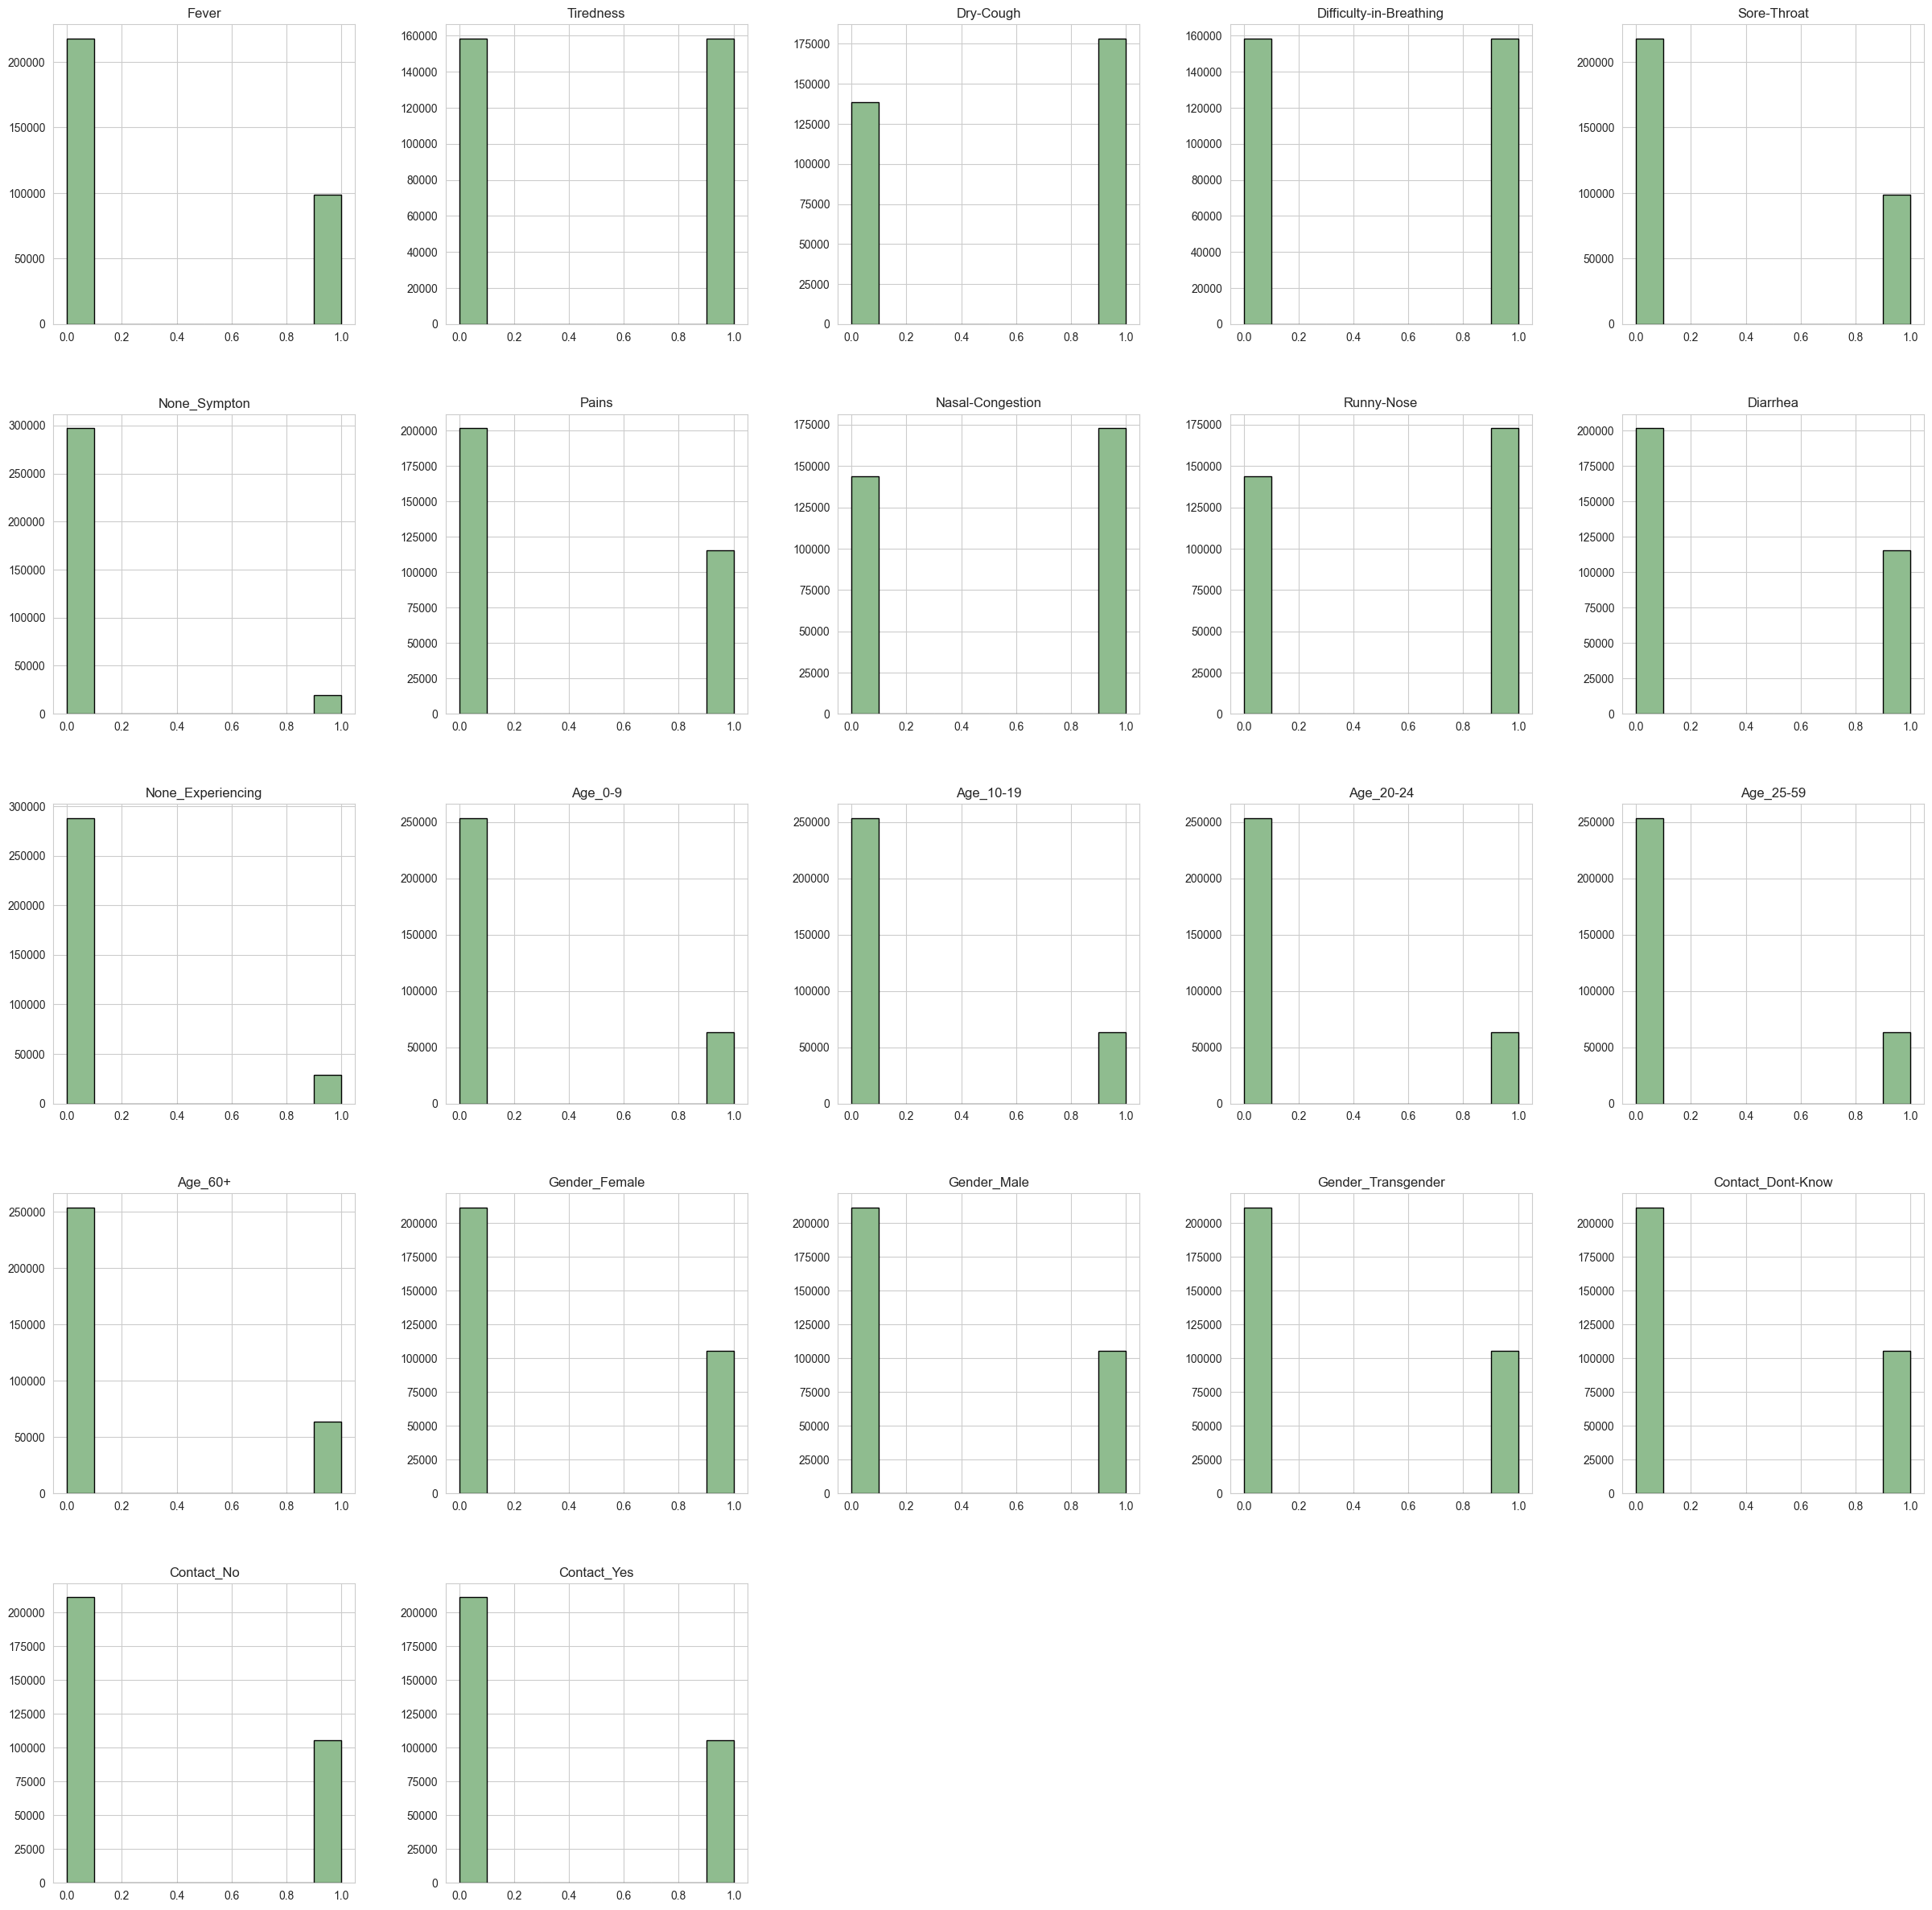

In [33]:
df.hist(figsize=(30,30), edgecolor='black', color='darkseagreen')

In [35]:
severity_columns = df.filter(like='Severity_').columns

In [36]:
df['Severity_None'].replace({1:'None',0:'No'},inplace =True)
df['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
df['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
df['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

In [37]:
df['Condition']=df[severity_columns].values.tolist()

In [38]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [39]:
df['Condition'] = df['Condition'].apply(removing)

Grouping by severity

In [40]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns

In [41]:
No_risk_age = df.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = df.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = df.groupby(['Severity_None'])[contact_columns].sum()

In [42]:
Low_risk_age = df.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = df.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = df.groupby(['Severity_Mild'])[contact_columns].sum()

In [43]:
Moderate_risk_age = df.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = df.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = df.groupby(['Severity_Moderate'])[contact_columns].sum()

In [44]:
Severe_risk_age = df.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = df.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = df.groupby(['Severity_Severe'])[contact_columns].sum()

In [51]:
df['Condition'] = df['Condition']

Finalmente nos queda en la variable 'Condition' el valor de la severidad. Que será nuestra característica de salida del modelo

In [52]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Condition
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Mild,No,No,No,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,No,Moderate,No,No,0,1,0,Moderate
